# Test 01

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
DATA_PATH = '../../data/test11'

## Sanity check

Just checking the the field profile is correct

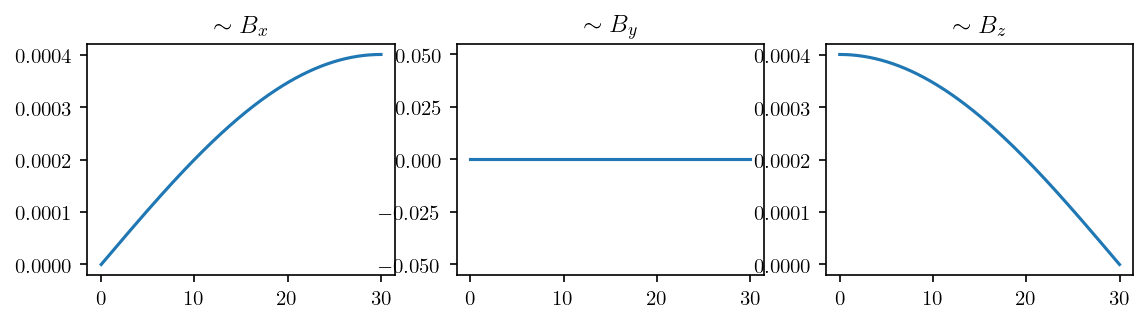

In [89]:
ctrj_raw = pd.read_csv(os.path.join(DATA_PATH,'10','30','5mT/trj/trj10.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()


## Vertex counting

In [4]:
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])
raw_data.total_time.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  30,  40,  50,  70,  80,  90,
       100])

In [12]:
vel_counts = dict()
counts = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])
for timevel,cdf in counts.groupby('total_time'):
    max_time = np.max(cdf.index.get_level_values('time').unique().to_list())
    vel_counts[timevel] = cdf.xs(max_time,level='time').sort_index(level='field')


In [36]:
for ttime, vdf in vel_counts.items():
    vdf['1p6'] = vdf['I'] + vdf['VI']
    vdf['1m6'] = (vdf['I'] - vdf['VI'])/(vdf['1p6'] + 0.00001)
    
    vdf['2p5'] = vdf['II'] + vdf['V']
    vdf['2m5'] = (vdf['II'] - vdf['V'])/(vdf['2p5'] + 0.00001)
    
    vdf['3p4'] = vdf['III'] + vdf['IV']
    vdf['3m4'] = (vdf['III'] - vdf['IV'])/(vdf['3p4'] + 0.00001)

In [37]:
types = ['I','II','III','IV','V','VI']
types2 = ['1p6','2p5','3p4','1m6','2m5','3m4']
types_fancy = [
    '$\\nu_1+\\nu_6$',
    '$\\nu_2+\\nu_5$',
    '$\\nu_3+\\nu_4$',
    '$(\\nu_1-\\nu_6)/(\\nu_1+\\nu_6)$',
    '$(\\nu_2-\\nu_5)/(\\nu_2+\\nu_5)$',
    '$(\\nu_3-\\nu_4)/(\\nu_3+\\nu_4)$'
]
field = vel_counts[30].index.to_list()
omegas = [np.pi/2/tt for tt in vel_counts.keys()]

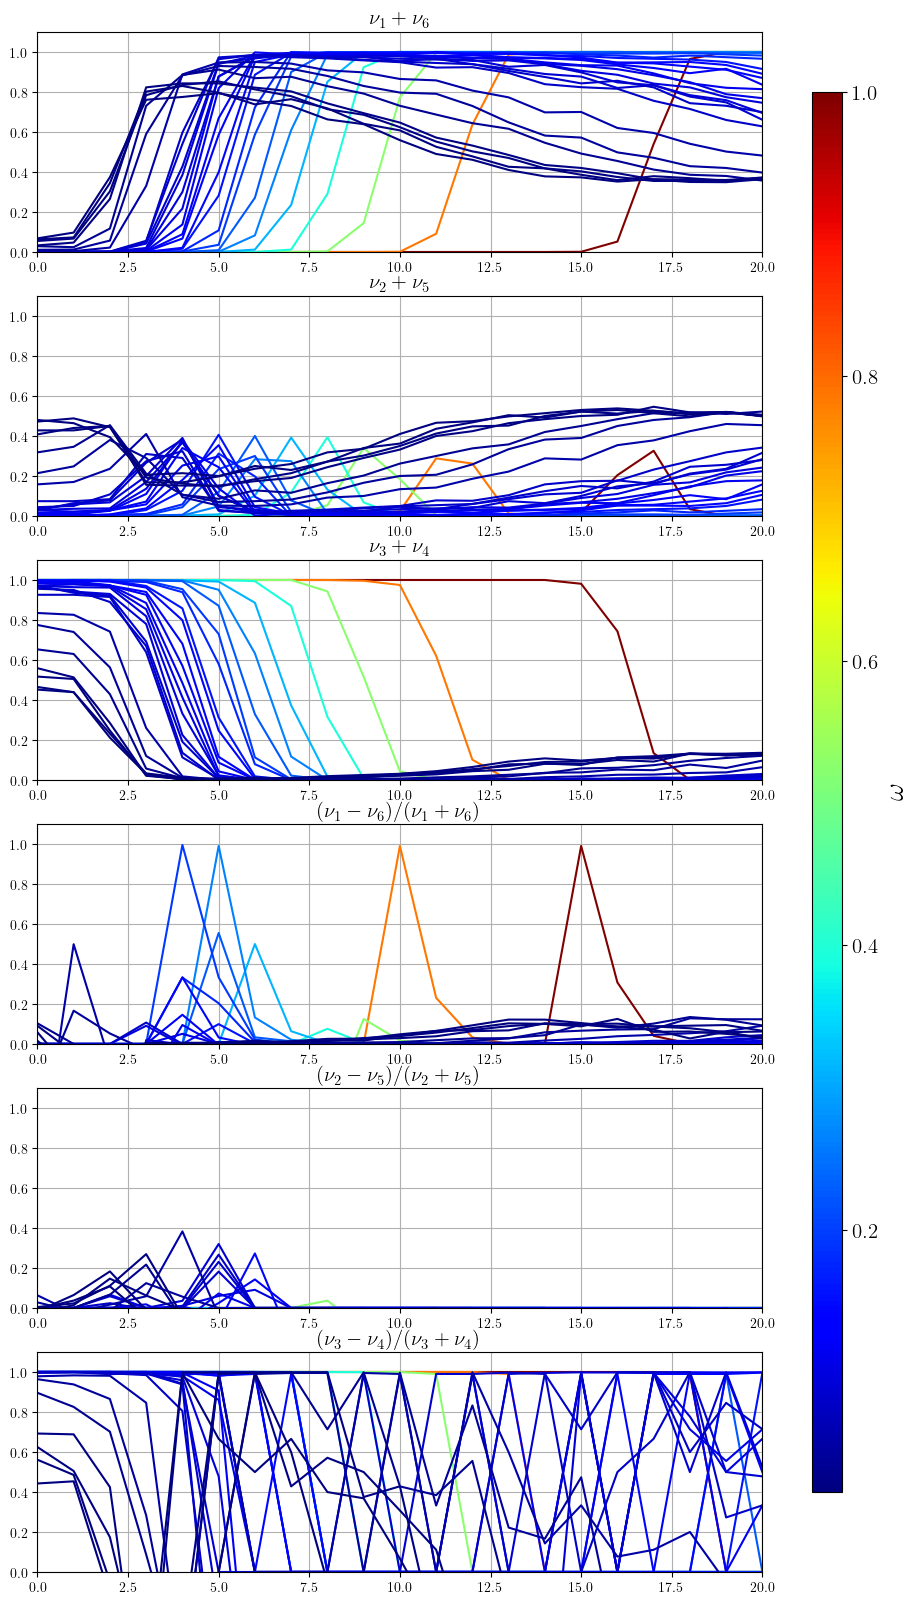

In [38]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]
#norm = plt.Normalize(min(omegas),max(omegas))
norm = plt.Normalize(min(omegas),1)

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(6,1,figsize=(10,20))

for i,vtp in enumerate(types2):
    ax = axes[i]
    for omega,(tt,cdf) in zip(omegas,vel_counts.items()):
        ax.plot(field,cdf[vtp], color=cmap(norm(omega)))
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,20)
    ax.set_title(types_fancy[i],fontsize=15)
    ax.grid()

#ax.set_xlabel('$B$ [mT]',fontsize=15)
#ax.axvspan(0,60,alpha=0.05, color='red')
#ax.axvspan(60,120,alpha=0.05, color='blue')
#ax.axvspan(120,180,alpha=0.05, color='green')

fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$',fontsize=20)
cbar.ax.tick_params(labelsize=15)
plt.show()

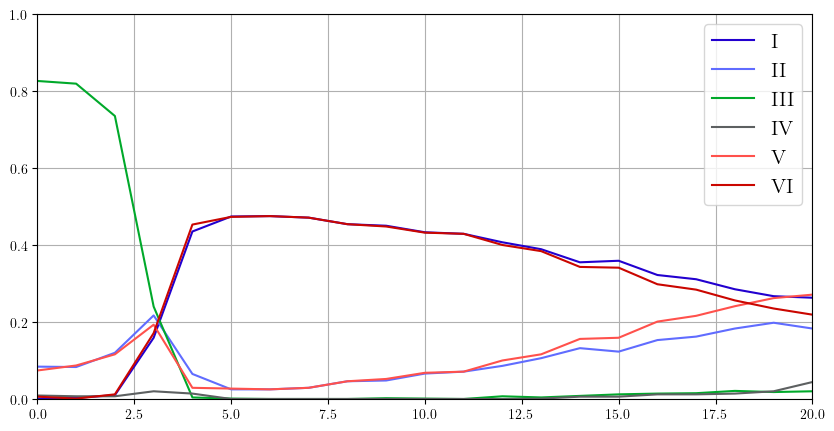

In [135]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]

fig, ax = plt.subplots(figsize=(10,5))
for i, (tp,ts) in enumerate(zip(types,vrt_counts.T)):
    ax.plot(field, ts, color=colors[i], label=tp)
ax.set_ylim(0,1)
ax.set_xlim(0,20)
#ax.set_xlabel('$B$ [mT]',fontsize=15)
#ax.axvspan(0,60,alpha=0.05, color='red')
#ax.axvspan(60,120,alpha=0.05, color='blue')
#ax.axvspan(120,180,alpha=0.05, color='green')
ax.legend(fontsize=15)
ax.grid()
plt.show()

In [137]:
counts

I     II    III     IV      V     VI  total_time
field time                                                       
20    0.00   0.000  0.000  1.000  0.000  0.000  0.000          30
      0.05   0.000  0.000  1.000  0.000  0.000  0.000          30
      0.10   0.000  0.000  1.000  0.000  0.000  0.000          30
      0.15   0.000  0.000  1.000  0.000  0.000  0.000          30
      0.20   0.000  0.000  1.000  0.000  0.000  0.000          30
...            ...    ...    ...    ...    ...    ...         ...
5     19.75  0.473  0.026  0.004  0.004  0.014  0.479          20
      19.80  0.471  0.029  0.004  0.004  0.013  0.479          20
      19.85  0.470  0.029  0.004  0.006  0.013  0.478          20
      19.90  0.471  0.029  0.004  0.003  0.015  0.478          20
      19.95  0.472  0.028  0.004  0.003  0.014  0.479          20

[193600 rows x 7 columns]

In [166]:
to_look = 30 
local_counts = counts[counts.total_time == to_look].xs(5,level='field').drop('total_time',axis=1)
time = local_counts.index.to_list()
local_counts = local_counts.to_numpy()

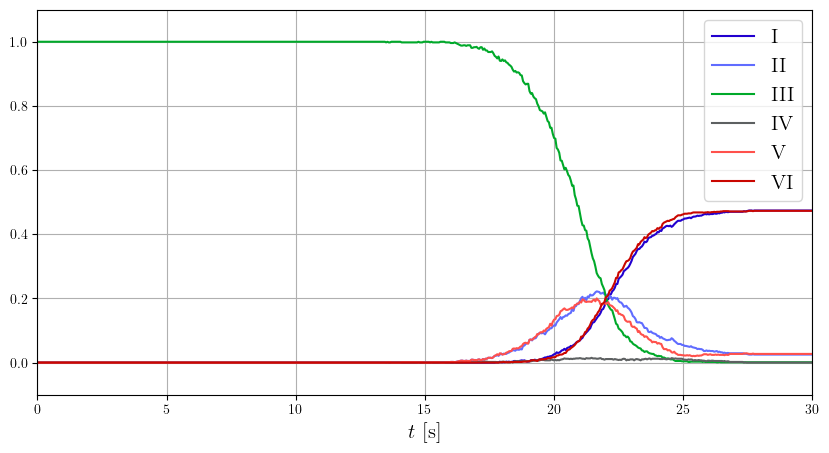

In [167]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]

fig, ax = plt.subplots(figsize=(10,5))
for i, (tp,ts) in enumerate(zip(types,local_counts.T)):
    ax.plot(time, ts, color=colors[i], label=tp)
ax.set_ylim(-0.1,1.1)
ax.set_xlim(0,to_look)
ax.set_xlabel('$t$ [s]',fontsize=15)
#ax.axvspan(0,60,alpha=0.05, color='red')
#ax.axvspan(60,120,alpha=0.05, color='blue')
#ax.axvspan(120,180,alpha=0.05, color='green')
ax.legend(fontsize=15)
ax.grid()
plt.show()

In [168]:
local_counts[-1,0]

0.474